In [10]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Mounted at /content/gdrive


In [0]:
import os
print(os.getcwd())

/content


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snsMT
#sns.set()

# load the data from csv files.
train = pd.read_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/titanic/data/train.csv")
test = pd.read_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/titanic/data/test.csv")
#train.head(3)

print("train data shape:",train.shape)
print("test data shape:",test.shape)
test

train data shape: (891, 12)
test data shape: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


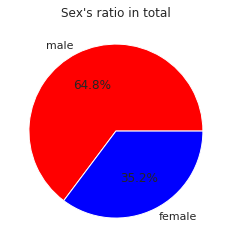

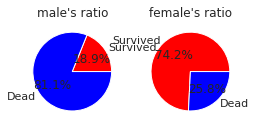

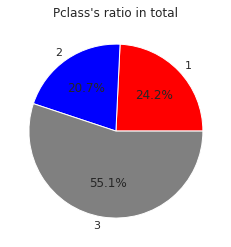

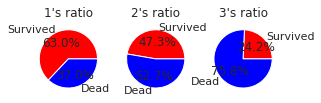

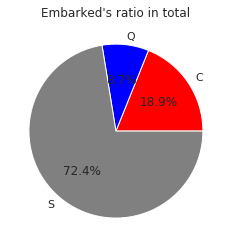

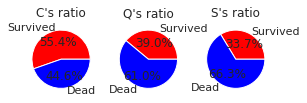

In [0]:
#### 3-1 Pie chart for Categorical Feature
#### Sex, Pclass, Embarked
'''
  @brief  draw the pie chart regarding each feature.
  @param  each feature(sec, Pcalss, Embarked)
'''
def pie_chart(feature):
  # 각 값이 나온 횟수를 센다.
  feature_ratio = train[feature].value_counts(sort=False)
  feature_size = feature_ratio.size
  feature_index = feature_ratio.index
  # survived: 1인 경우의 횟수를 센다.
  survived = train[train["Survived"]==1][feature].value_counts()
  # dead: 0인 경우의 횟수를 센다.
  dead = train[train["Survived"]== 0][feature].value_counts()


  plt.plot(aspect='auto')
  plt.pie(feature_ratio, labels=feature_index, autopct="%1.1f%%", colors=['red','blue', 'gray'])
  #Sex's ratio in total
  plt.title(feature + "\'s ratio in total")
  plt.show()

  for i,index in enumerate(feature_index):
    plt.subplot(1, feature_size+1, i+1, aspect='equal')
    plt.pie([survived[index], dead[index]], labels=['Survived','Dead'], autopct = "%1.1f%%", colors=['red','blue', 'gray'])
    plt.title(str(index)+"\'s ratio")

  plt.show()

pie_chart("Sex")
pie_chart("Pclass")
pie_chart("Embarked")


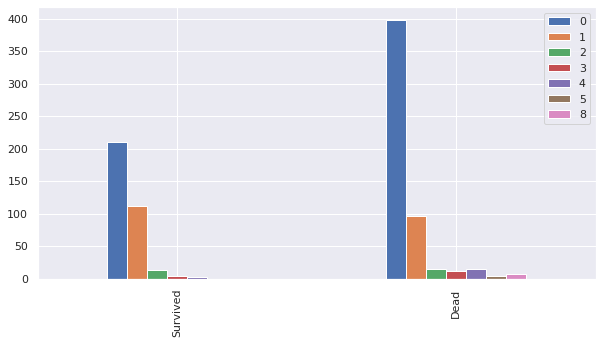

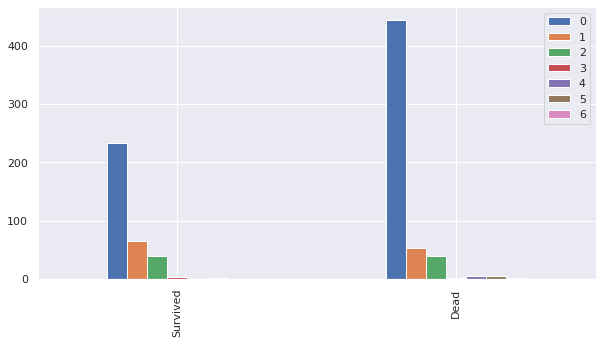

In [0]:
#### 3-2. Bar chart for Categorical feature
#### SibSp(# of siblings), Parch(# of parents and children)
'''
  @brief  draw a bar chart regarding each feature
  @param  feature
'''
def bar_chart(feature):
  survived = train[train["Survived"]==1][feature].value_counts()
  dead = train[train["Survived"]==0][feature].value_counts()
  df=pd.DataFrame([survived,dead])
  df.index=['Survived','Dead']
  # stacked: 누적 그래프 여부 파악
  # figsize: figure size
  df.plot(kind='bar', stacked = False, figsize=(10,5))

bar_chart("SibSp")
bar_chart("Parch")


# 여성일수록(여성과 아이부터 먼저 살렸기 때문일 듯)
# PClass가 높아질수록(티켓 등급이 높아질수록 배의 앞쪽, 위쪽 -> 뒤쪽부터 타이타닉 호 침몰)
# Cherbourg 선착장에서 탈수록
# 형제, 자매, 배우자, 부모, 자녀와 함께 탔다면.
# 생존확률이 높았을 것으로 추측.

데이터 전처리 및 특성 추출

In [0]:
#### 데이터 전처리 및 특성 추출

#### 4-1. Name feature: 이름과 survive의 관계
total = [train, test]
for dataset in total:
  # extract Mr or Miss or Mrs
  # 정규표현식: 공백 시작 and .으로 끝나는 문자열 추출
  dataset['Title'] = dataset.Name.str.extract("([A-Za-z]+)\.")

train.head(5)
# 추출한 Title을 가진 사람이 몇 명 존재하는지 표현
pd.crosstab(train['Title'], train['Sex'])

# 흔치 않은 Title들은 Other로 대체
for dataset in total:
  dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer','Lady','Major', 'Rev', 'Sir'], 'Other')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

# title, survived의 평균 관계 보기
# groupby:
# mean: 
train[['Title', 'Survived']].groupby('Title', as_index=False).mean()

# data를 string data로 변형
for data in total:
  data['Title']=data['Title'].astype(str)

######################################################################################################################

#### 4-2. Sex Feature
# data를 string data로 변형
for data in total:
  data['Sex'] = data['Sex'].astype(str)

######################################################################################################################

#### 4-3. Embarked Feature
# data를 string data로 변형
for data in total:
  data['Embarked'] = data['Embarked'].fillna('S')
  data['Embarked'] = data['Embarked'].astype(str)

######################################################################################################################

#### 4-4. Age Feature
# Binning: 여러 종류의 데이터에 대해 범위 지정 or 카테고리를 통해 이전보다 작은 수의 그룹으로 만드는 기법
# 장점: 단일선 분포의 왜곡 방지
# 단점: 이산화에 따른 데이터의 손실

#print(train['Age'])


for data in total:
  # fill the 'NaN' data to the mean age of all passengers.
  data['Age'].fillna(0, inplace=True)
  data['Age'] = data['Age'].astype(int)
  # 5개 그룹으로 age 나눔
  # pd.cut(): 같은 길이의 구간을 가지는 다섯 개의 그룹
  train['AgeBand'] = pd.cut(train['Age'],5)
# Survived ratio about Age Band
#print(train[['AgeBand','Survived']]).groupby(['AgeBand'], as_index=False).mean()


# Age Band 구간 바꾸기
for data in total:
  # 0: 16세 이하
  data.loc[data['Age']<=16, 'Age'] = 0
  # 1: 16세 ~ 31세
  data.loc[(data['Age']>16) & (data['Age']<=32), 'Age'] = 1
  # 2: 32세 ~ 48세
  data.loc[(data['Age']>32) & (data['Age']<=48), 'Age'] = 2
  # 3: 49세 ~ 64세
  data.loc[(data['Age']>48) & (data['Age']<=64), 'Age'] = 3
  # 4: 64세 이상
  data.loc[(data['Age']>64), 'Age'] = 4
  # string  형식으로 바꿔줌.
  #data['Age'] = data['Age'].map({0:'Child', 1: 'Young', 2: 'Middle' , 3: 'Prime', 4: 'Old'}).astype(str)

#print(train['Age'])

######################################################################################################################

#### 4-5. Fare Feature
# Correlation between fare and Pclass data.

#print(train[['Pclass','Fare']].groupby(['Pclass'], as_index=False).mean())
# 누락된 사람의 Pclass는 3이다.
#print(test[test["Fare"].isnull()])

for dataset in total:
  dataset['Fare'] = dataset['Fare'].fillna(13.6750)

# Binning the fare
for dataset in total:
  dataset.loc[dataset['Fare']<= 7.584, 'Fare'] = 0
  dataset.loc[(dataset['Fare']> 7.584) & (dataset['Fare']<=10.5), 'Fare'] = 1
  dataset.loc[(dataset['Fare']> 10.5) & (dataset['Fare']<=21.679), 'Fare'] = 2
  dataset.loc[(dataset['Fare']> 21.679) & (dataset['Fare']<=39.688), 'Fare'] = 3
  dataset.loc[dataset['Fare']> 39.688, 'Fare'] = 4
  dataset['Fare'] = dataset['Fare'].astype(str)



######################################################################################################################

#### 4-6. SibSp & Parch Feature(Family)
for dataset in total:
  dataset['Family'] = dataset["Parch"] + dataset["SibSp"]
  dataset['Family'] = dataset["Family"].astype(str)


######################################################################################################################

#### 4-7. 특성 추출 및 나머지 전처리
# 학습시 제외시킬 feature들 drop
features_drop = ['Name','Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(["PassengerId", "AgeBand"], axis=1)

#print(train.head())
#print(test.head())


######################################################################################################################

#### 4-8. Transfer to One-hot coding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# labeling
train_label = train['Survived']
train_data = train.drop("Survived", axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

train_data




,Pclass,Age,Sex_female,Sex_male,Fare_0.0,Fare_1.0,Fare_2.0,Fare_3.0,Fare_4.0,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Family_0,Family_1,Family_10,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7
0,3,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,1,2,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,3,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,3,2,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
887,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
888,3,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
889,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [0]:
###### 예측 모델 5가지
######
# 1. Logistic Regression
# 2. Support Vector Machine(SVM)
# 3. K-Nearest Neighbor(kNN)
# 4. Random Forest
# 5. Naive Bayes
# 6. Extra Trees Classifier


from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import ExtraTreesClassifier as  ETC

from sklearn.utils import shuffle

# data 정렬되어 있어 학습에 방해가 될 수도 있으므로 섞어준다.
#train_data, train_label = shuffle(train_data, train_label, random_state=5)

'''
  @brief  train the data and predict the accuracy
  @param  type of model
  @return prediction
'''
def train_and_test(model):
  model.fit(train_data, train_label)
  prediction = model.predict(test_data)
  accuracy = model.score(train_data, train_label)
  print("Accuracy : ", accuracy, "%")
  return prediction

log_pred = train_and_test(LR())
svm_pred = train_and_test(SVC())
knn_pred = train_and_test(KNC(n_neighbors=20))
rfc_pred = train_and_test(RFC(n_estimators=500))
nb_pred = train_and_test(GNB())
etc_pred = train_and_test(ETC(n_estimators=500))

# Submit the file to Kaggle
sub1 = pd.DataFrame({
  "PassengerId": test["PassengerId"],
  "Survived": log_pred  
})
sub2 = pd.DataFrame({
  "PassengerId": test["PassengerId"],
  "Survived": svm_pred  
})
sub3 = pd.DataFrame({
  "PassengerId": test["PassengerId"],
  "Survived": knn_pred  
})
sub4 = pd.DataFrame({
  "PassengerId": test["PassengerId"],
  "Survived": rfc_pred  
})
sub5 = pd.DataFrame({
  "PassengerId": test["PassengerId"],
  "Survived": nb_pred  
})
sub6 = pd.DataFrame({
  "PassengerId": test["PassengerId"],
  "Survived": etc_pred  
})


#sub1.to_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/titanic/data/submit_log.csv", index=False)
#sub2.to_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/titanic/data/submit_svm.csv", index=False)
sub3.to_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/titanic/data/submit_knn_20.csv", index=False)
#sub4.to_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/titanic/data/submit_rfc_500.csv", index=False)
#sub5.to_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/titanic/data/submit_nb.csv", index=False)
#sub6.to_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/titanic/data/submit_etc_500.csv", index=False)





Accuracy :  0.8271604938271605 %
Accuracy :  0.8395061728395061 %
Accuracy :  0.8271604938271605 %
Accuracy :  0.8933782267115601 %
Accuracy :  0.47362514029180697 %
Accuracy :  0.8933782267115601 %
